In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('titanic.csv', usecols= ['Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

<ipython-input-10-55cc01c98bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'] = X_train['Age']
<ipython-input-10-55cc01c98bba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_imputed'] = X_test['Age']


In [29]:
X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

array([48. , 37. , 23. , 48. , 36. , 32. , 30. , 25. , 35. , 26. , 17. ,
       19. , 24. , 35. , 26. , 19. , 24. , 30. , 24. , 64. , 31. , 31. ,
       29. , 24.5, 29. , 19. , 15. , 38. , 39. ])

In [30]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


ValueError: Length of replacements must equal series length

In [22]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 18.  , 66.  , 45.  , 28.  , 26.  , 12.  , 42.  , 27.  ,
       28.  , 14.  , 18.  , 30.  , 29.  , 19.  , 33.  , 51.  , 20.  ,
       34.  , 51.  , 26.  , 25.  ,  0.42,  0.83, 17.  ,  0.83, 59.  ,
       22.  , 25.  , 44.  , 19.  , 43.  ,  2.  , 25.  , 11.  ,  2.  ,
       32.  , 36.  , 25.  , 56.  , 19.  , 49.  ,  5.  , 51.  , 62.  ,
        4.  , 28.  , 24.  , 35.  , 32.  , 20.  , 21.  , 30.  , 47.  ,
       22.  , 31.  , 29.  , 49.  , 48.  , 23.  , 32.  , 36.  , 35.  ,
        2.  ,  1.  ,  3.  , 33.  ,  4.  , 51.  , 23.  , 19.  , 24.  ,
       28.  , 36.  , 36.  , 36.5 , 32.5 , 13.  ,  8.  , 50.  , 21.  ,
        4.  , 20.  , 41.  , 21.  , 24.  , 42.  , 30.  , 14.  , 52.  ,
       39.  , 53.  , 36.  , 24.  , 27.  , 54.  , 43.  , 29.  , 56.  ,
       18.  , 63.  , 22.  , 26.  , 23.  , 16.  , 24.  , 30.  , 23.  ,
       16.  , 31.  , 47.  , 18.  , 29.  , 48.  ,  9.  , 16.  , 20.  ,
       42.  , 58.  , 21.  , 22.  , 15.  ,  9.  , 40.  , 39.  , 30.5 ,
       33.  , 57.  ,

In [23]:
X_train['Age'].isnull().sum()

148

c:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


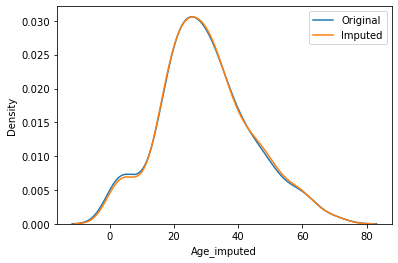

In [24]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()